# **Building-a-Content-Based-Filtering-Movie-Recommendation-System**


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('data_ass2_part1_wk5.csv')

In [ ]:
data.head()

,Customer,DisplayAd,TwitterLink,SpSearch,Youtube,Recommender,OSearch,Conversion,first_click
0,1,1,1,1,0,1,0,0,Recommender
1,2,1,1,1,0,1,0,0,TwitterLink
2,3,1,1,1,1,0,1,1,YouTube
3,4,1,1,1,1,1,0,0,Recommender
4,5,1,1,1,1,0,0,0,DisplayAd


In [ ]:
data.describe()

,Customer,DisplayAd,TwitterLink,SpSearch,Youtube,Recommender,OSearch,Conversion
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.670000,0.720000,0.705000,0.665000,0.470000,0.525000,0.500000
std,57.879185,0.471393,0.450126,0.457187,0.473175,0.500352,0.500628,0.501255
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,150.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Insights:

**1.Conversion Rate:** The mean of the Conversion column is 0.50, meaning that 50% of the customers in the sample converted (watched a movie).

**2.Channel Interaction:**
* DisplayAd: 67% of customers saw a Display Ad (DisplayAd mean = 0.67).
* TwitterLink: 72% of customers clicked on the Twitter link (TwitterLink mean = 0.72).
* SpSearch: 70.5% of customers clicked on the sponsored search link (SpSearch mean = 0.705).
* Youtube: 66.5% of customers saw the YouTube pre-roll ad (Youtube mean = 0.665).
* Recommender: 47% of customers saw a personalized movie recommendation (Recommender mean = 0.47).
* OSearch: 52.5% of customers clicked on an organic search link (OSearch mean = 0.525).

**3.Distribution:** The 25th, 50th (median), and 75th percentiles for most of the channels suggest they are binary variables (0 or 1), with a relatively even distribution of customers who interacted (1) and did not interact (0) with each channel.

\


**Question 1** - The manager wants to you to estimate a logistic regression model that will help to see which of these channels have an impact on whether the consumer converted yes or no. Describe the impact both in terms of significance as well as in terms of magnitude. Note that the manager is currently interested in the main effects of the touchpoints, not in possible carryover or spillover effects.

In [ ]:
import statsmodels.formula.api as smf
formula = 'Conversion ~ DisplayAd + TwitterLink + SpSearch + Youtube + Recommender + OSearch'
model = smf.logit(formula, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.347556
         Iterations 7


In [ ]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:             Conversion   No. Observations:                  200
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                  0.4986
Time:                        09:24:08   Log-Likelihood:                -69.511
converged:                       True   LL-Null:                       -138.63
Covariance Type:            nonrobust   LLR p-value:                 2.361e-27
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.7147      0.927     -5.087      0.000      -6.531      -2.898
DisplayAd       0.4438      0.466      0.952      0.341      -0.470       1.358
TwitterLink     0.2288      0.500      0.457    

### Top Impact Channels

**1.Organic Search (*OSearch*):**

* **Significance:** Highly statistically significant (p-value < 0.001), indicating a strong and reliable relationship with conversion.
* **Magnitude:** The largest positive coefficient (4.2721), suggesting a dramatic increase in the likelihood of conversion when a customer clicks on an organic search link.

**2.Personalized Recommendations (*Recommender*):**

* **Significance:** Highly statistically significant (p-value < 0.001), indicating a strong and reliable relationship with conversion.
* **Magnitude:** The second-largest positive coefficient (2.2328), suggesting a substantial increase in the likelihood of conversion when a customer sees a personalized movie recommendation.

**3.YouTube Ads (*Youtube*):**

* **Significance:** Statistically significant (p-value = 0.044), indicating a reliable relationship with conversion.
* **Magnitude:** The third-largest positive coefficient (0.9554), suggesting a notable increase in the likelihood of conversion when a customer sees a YouTube pre-roll ad.

\


### Data preprocessing

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv('data_ass2_part2_wk5.csv')

In [ ]:
movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
1,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",NaN,NaN,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
2,Yoga with Sound Meditations,Mark Knight,Ann-Marie Newland,NaN,NaN,2016,ALL,9 min,"Fitness, Special Interest",This session will establish how to prepare for...
3,Yoga to Harness Your Chakra Energy,Mark Knight,Caroline Shola Arewa,NaN,NaN,2014,ALL,18 min,"Faith and Spirituality, Special Interest",Sharecare Windows presents Caroline Shola Arew...
4,Yoga to Ease Flight Anxiety,Mark Knight,Anne-Marie Newland,NaN,NaN,2016,ALL,14 min,"Fitness, Special Interest",Reduce the stress of flying by using these sim...


In [ ]:
movies.columns

Index(['title', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
movies.shape

(3729, 10)

In [ ]:
print(movies.count())

title           3729
director        3588
cast            3227
country          274
date_added         1
release_year    3729
rating          3729
duration        3729
listed_in       3729
description     3729
dtype: int64


In [ ]:
# Check the percentage of missing values in the column "country"
country_na = (movies['country'].isna().sum() / len(movies)) * 100
print(f"{country_na:.2f}% of rows in column 'country' are missing values")

# Check the percentage of missing values in the column "date_added"
date_na = (movies['date_added'].isna().sum() / len(movies)) * 100
print(f"{date_na:.2f}% of rows in column 'date_added' are missing values")

92.65% of rows in column 'country' are missing values
99.97% of rows in column 'date_added' are missing values


The columns *country* and *date_added* acount for too many rows missing values. Therefore, due to not providing enough significant information, they will be removed from the dataset.

Moreover, the columns will be renamed for easier understanding and the index will be set to the title of the movie for reference.

In [ ]:
# Create the new dataframe without the columns "country" and "date_added"
movies = movies[['title','director','cast','release_year', 'rating', 'duration', 'listed_in', 'description']]

In [ ]:
# Rename the columns
movies = movies.rename(columns={
    'title': 'Title',
    'director': 'Director',
    'cast': 'Actors',
    'release_year': 'Year',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Genre',
    'description': 'Plot'
})

In [ ]:
# Set index to the title of the movie
movies.set_index(['Title'], inplace=True)

In [ ]:
movies.head()

,Director,Actors,Year,Rating,Duration,Genre,Plot
Title,,,,,,,
Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
Yoga with Sound Meditations,Mark Knight,Ann-Marie Newland,2016,ALL,9 min,"Fitness, Special Interest",This session will establish how to prepare for...
Yoga to Harness Your Chakra Energy,Mark Knight,Caroline Shola Arewa,2014,ALL,18 min,"Faith and Spirituality, Special Interest",Sharecare Windows presents Caroline Shola Arew...
Yoga to Ease Flight Anxiety,Mark Knight,Anne-Marie Newland,2016,ALL,14 min,"Fitness, Special Interest",Reduce the stress of flying by using these sim...


Now lets proceed by extracting the key words from the plot descriptions of the movies. Therefore, instead of using the entire sentences describing the plot, only the most relevant words will be considered. This way, insignificant words will be avoided and the model will perform with more precision.  

For further cleaning the data, all first and last names from the columns *Director* and *Actors* will be joined into a single unique word, in order to avoid repetition. Moreover, lists will be created for the columns holding more than one unique word and everything will be turned into lowercase letters, to avoid duplications and for better understanding.

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from rake_nltk import Rake

# Extract the key words from the plot description of the movies and store it in a new column
movies['Key_words'] = ""
for index, row in movies.iterrows():
  plot = row['Plot']
  r = Rake()
  r.extract_keywords_from_text(plot)
  key_words_dict_scores = r.get_word_degrees()
  movies.loc[index, 'Key_words'] = ' '.join(list(key_words_dict_scores.keys()))

movies.drop(columns = ['Plot'], inplace=True)

In [ ]:
# Extracts the first 3 actors from the "Actors" column, converts them to lowercase, removes spaces, stores them as a list.
movies['Actors'] = movies['Actors'].astype(str).apply(lambda x: [a.lower().replace(' ', '') for a in x.split(',')[:3]])

# Converts the "Genre" column to lowercase, splits by commas, stores as a list of genres.
movies['Genre'] = movies['Genre'].astype(str).apply(lambda x: x.lower().split(','))

# Converts the "Director" column to lowercase, removes spaces, merges first and last names into a single word.
movies['Director'] = movies['Director'].astype(str).apply(lambda x: ''.join(x.split(' ')).lower())

# Converts the "Key_words" columnto lowercase, splits by spaces, stores as a list of keywords.
movies['Key_words'] = movies['Key_words'].astype(str).apply(lambda x: x.lower().split())

In [ ]:
movies.head()

,Director,Actors,Year,Rating,Duration,Genre,Key_words
Title,,,,,,,
Take Care Good Night,girishjoshi,"[maheshmanjrekar, abhaymahajan, sachinkhedekar]",2018,13+,110 min,"[drama, international]","[metro, family, decides, fight, cyber, crimina..."
Zoombies,glennmiller,"[marcusanderson, kaiwilyman, andrewasper]",2016,13+,87 min,"[horror, science fiction]","[strange, virus, quickly, spreads, safari, par..."
Yoga with Sound Meditations,markknight,[ann-marienewland],2016,ALL,9 min,"[fitness, special interest]","[session, establish, prepare, practice, mindfu..."
Yoga to Harness Your Chakra Energy,markknight,[carolinesholaarewa],2014,ALL,18 min,"[faith and spirituality, special interest]","[sharecare, windows, presents, caroline, shola..."
Yoga to Ease Flight Anxiety,markknight,[anne-marienewland],2016,ALL,14 min,"[fitness, special interest]","[reduce, stress, flying, using, simple, affect..."


The dataframe is now properly organized. To finalize with the data preprocessing, a bag-of-words representation of the movie data will be introduced by combining all relevant information from the columns into a single string for each movie, simplifying text data.

In [ ]:
# Merge all non-index columns into a bag_of_words representation
movies['bag_of_words'] = ''
columns = movies.columns
for index, row in movies.iterrows():
    words = ''
    for col in columns:
        if col != 'bag_of_words':
            value = row[col]
            if isinstance(value, list):
                words = words + ' '.join(map(str, value)) + ' '
            else:
                words = words + str(value) + ' '
    movies.loc[index, 'bag_of_words'] = words

movies = movies[['bag_of_words']]

In [ ]:
movies.head()

,bag_of_words
Title,
Take Care Good Night,girishjoshi maheshmanjrekar abhaymahajan sachi...
Zoombies,glennmiller marcusanderson kaiwilyman andrewas...
Yoga with Sound Meditations,markknight ann-marienewland 2016 ALL 9 min fit...
Yoga to Harness Your Chakra Energy,markknight carolinesholaarewa 2014 ALL 18 min ...
Yoga to Ease Flight Anxiety,markknight anne-marienewland 2016 ALL 14 min f...


This final dataframe allows for easier comparison and analysis of text data when using the cosine similarity technique in order to build the content-based recommender system.

### Modeling

To detect similarities between movies, vectorization is necessary. For this purpose, *CountVectorizer* was chosen instead of *TfIdfVectorizer*. The rationale behind this choice is that a straightforward frequency counter for each word in the *bag_of_words* column is required. Tf-Idf tends to downweight words that appear frequently across the entire corpus (the *bag_of_words* column in this instance), which is undesirable for this application, as every word is deemed important for similarity detection.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating the count matrix
count_matrix = CountVectorizer().fit_transform(movies['bag_of_words'])

Once the word count matrix is obtained, the cosine_similarity function can be applied to see the similarities between the movies in the dataframe. Also, for easier visualization, a heatmap showing the similarities between the first 10 movies in the dataframe will help understand the relationship between movies more intuitively.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Create the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.08520286, 0.0338255 , ..., 0.09176629, 0.08377078,
        0.07755667],
       [0.08520286, 1.        , 0.05475857, ..., 0.03713907, 0.06780635,
        0.09416472],
       [0.0338255 , 0.05475857, 1.        , ..., 0.02948839, 0.0269191 ,
        0.02492224],
       ...,
       [0.09176629, 0.03713907, 0.02948839, ..., 1.        , 0.07302967,
        0.13522468],
       [0.08377078, 0.06780635, 0.0269191 , ..., 0.07302967, 1.        ,
        0.06172134],
       [0.07755667, 0.09416472, 0.02492224, ..., 0.13522468, 0.06172134,
        1.        ]])

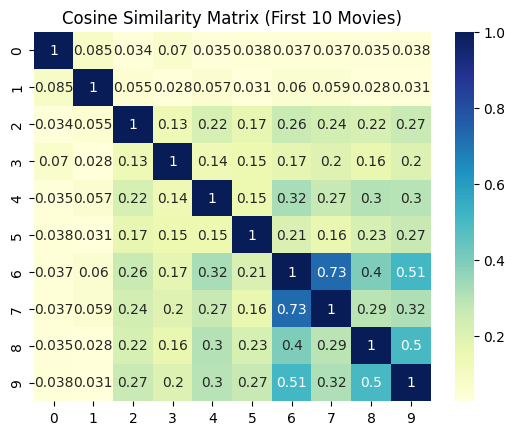

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the similarities between the first 10 movies
cosine_sim_10 = cosine_sim[:10, :10]
sns.heatmap(cosine_sim_10, cmap="YlGnBu", annot=True)
plt.title("Cosine Similarity Matrix (First 10 Movies)")
plt.show()

The cosine similarity matrix shows how similar movies are based on their content. The diagonal is all 1's because every movie is identical to itself. The matrix is symmetrical; the similarity between movie A and B is the same as between B and A. Off-diagonal values show similarity between different movies: higher values (closer to 1) mean stronger similarity. For example, the first and second movies have a similarity of 0.0852, while the first and fourth have a lower similarity of 0.057.

Now, a function can be defined that takes a movie title as input and returns the top 10 most similar movies. To achieve this, a series of movie titles with numerical indices has been created to facilitate the mapping between the similarity matrix indices and the actual movie titles. The function, upon receiving the input, identifies the 10 highest similarity values within the row corresponding to the input movie, excluding the self-similarity value of 1. It then retrieves the corresponding indices and matches them to the movie titles series to generate a list of recommended movies.

In [ ]:
# Associate each movie tittle to an ordered numerical
indices = pd.Series(movies.index)

# Takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]  # Getting the index of the movie that matches the title
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)  # Creating a Series with the similarity scores in descending order
    top_10_indexes = list(score_series.iloc[1:11].index)  # Getting the indexes of the 10 most similar movies

    for i in top_10_indexes:
        recommended_movies.append(list(movies.index)[i])  # Populating the list with the titles of the best 10 matching movies

    return recommended_movies

### Resuts

Lets test the recommender system by showing the user all the available 3729 movies released on the platform after 2012. When introducing the name of one of these movies into the recommender system, it will automatically recommend the 10 most similar movies.

In [ ]:
# Display available movies
print("Available movies:")
print("-" * 30)
print("{:<5} {:<}".format("Index", "Movie Title"))
print("-" * 30)

for i, title in enumerate(movies.index):
    print("{:<5} {:<}".format(i + 1, title))

print("-" * 30)

Available movies:
------------------------------
Index Movie Title
------------------------------
1     Take Care Good Night
2     Zoombies
3     Yoga with Sound Meditations
4     Yoga to Harness Your Chakra Energy
5     Yoga to Ease Flight Anxiety
6     Yoga to Break Any Habit
7     Yoga Savasana Relaxation
8     Yoga for Relaxation Anywhere
9     Yoga for Relaxation and Stress Relief Anywhere
10    Yoga for Relaxation and Stress Relief
11    Yoga for Mindfulness and Meditation
12    Yoga for Men's Health
13    Yoga for Breath Awareness
14    Yoga For Beginners
15    Yoga for Abdominal Breathing
16    Yatra (Telugu)
17    Yatra (Malayalam)
18    Wonderful Nursery Rhymes with Mia - Little Baby Bum
19    Wonderful Nursery Rhymes with Jacus - By Little Baby Bum
20    Woke Up Like This
21    William the Conqueror
22    William Tecumseh Sherman: Beyond the March to the Sea
23    William Lee Martin: The Nutcracker - A Christmas Stand-up Comedy Spectacular
24    William Lee Martin: Standing 

In [ ]:
# Get user input for movie title and print its recommended movies
movie_title = input("Enter a movie title from the list above: \n")

if movie_title in movies.index:
    recommended_list = recommendations(movie_title)

    print("\nRecommended movies:")
    for movie in recommended_list:
        print(movie)
else:
    print("Movie is not on the platform")

Enter a movie title from the list above: 
Yoga with Sound Meditations

Recommended movies:
Yoga for Mindfulness and Meditation
3 Simple Meditation Practices
Yoga For Beginners
15 Minute Ocean Meditation
Alternate Nostril Breathing
Yoga for Breath Awareness
6 Minutes of Yoga By The Ocean
10-Minute Guided Meditation
15-Minute Guided Meditation
Seated Yoga Level II


### **Creating a Movie Recommender Interface**

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [ ]:
import pandas as pd
import gradio as gr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the dataset
movies = pd.read_csv('data_ass2_part2_wk5.csv')

In [ ]:
# Data preprocessing steps
movies = movies[['title','director','cast','release_year', 'rating', 'duration', 'listed_in', 'description']]
movies = movies.rename(columns={
    'title': 'Title',
    'director': 'Director',
    'cast': 'Actors',
    'release_year': 'Year',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Genre',
    'description': 'Plot'
})
movies.set_index(['Title'], inplace=True)

In [ ]:
# Combine features into a single string
movies['bag_of_words'] = ''
columns = movies.columns
for index, row in movies.iterrows():
    words = ''
    for col in columns:
        if col != 'bag_of_words':
            value = row[col]
            if isinstance(value, list):
                words = words + ' '.join(map(str, value)) + ' '
            else:
                words = words + str(value) + ' '
    movies.loc[index, 'bag_of_words'] = words

movies = movies[['bag_of_words']]

In [ ]:
# Create the CountVectorizer and cosine similarity matrix
count_matrix = CountVectorizer().fit_transform(movies['bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Recommendation function
def recommendations(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indexes = list(score_series.iloc[1:11].index)
    for i in top_10_indexes:
        recommended_movies.append(list(movies.index)[i])
    return recommended_movies

In [ ]:
# Create a Series for the movie titles (for easy lookup)
indices = pd.Series(movies.index)

def make_recommendations(movie_title):
    if movie_title not in movies.index:
        return "Movie not found in the dataset"

    recs = recommendations(movie_title)
    return "<br>".join(recs)  # Use HTML line breaks

In [ ]:
# Gradio Interface
iface = gr.Interface(
    fn=make_recommendations,
    inputs=gr.Dropdown(choices=list(movies.index), label="Select a movie:"),
    outputs=gr.HTML(label="Recommended Movies"),  # Use HTML output
    title="<div style='text-align: left;'>Movie Recommendation System</div>", # Move title to left
    description="Select a movie title and get 10 movie recommendations. Please wait as it takes some time for computing the result.",
    theme="gradio/soft"
)

In [ ]:
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://79fe1e42497418531e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
